# Limpieza y transformacion de los datos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Informacion del dataset**:

Tomado de: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Actualmente, las bicicletas de alquiler se introducen en muchas ciudades urbanas para mejorar la comodidad de la movilidad. Es importante que la bicicleta de alquiler esté disponible y accesible para el público en el momento adecuado, ya que reduce el tiempo de espera. Con el tiempo, proporcionar a la ciudad un suministro estable de bicicletas de alquiler se convierte en una preocupación importante. La parte crucial es la predicción del conteo de bicicletas requerido en cada hora para el suministro estable de bicicletas de alquiler.
El conjunto de datos contiene información meteorológica (temperatura, humedad, velocidad del viento, visibilidad, punto de rocío, radiación solar, nevadas, precipitaciones), el número de bicicletas alquiladas por hora e información sobre la fecha.

- Fecha: año-mes-día
- Recuento de bicicletas alquiladas: recuento de bicicletas alquiladas en cada hora
- Hora - Hora del día
- Temperatura-Temperatura en Celsius
- Humedad - %
- Velocidad del viento - m/s
- Visibilidad - 10m
- Temperatura de punto de rocío - Celsius
- Radiación solar - MJ/m2
- Precipitación - mm
- Nevadas - cm
- Estaciones: invierno, primavera, verano, otoño
- Festivo - Festivo/No festivo
- Jornada Funcional - NoFunc(Horas No Funcionales), Fun(Horas Funcionales)

In [3]:
# Importamos el data set:
df = pd.read_csv("data/SeoulBikeData.csv", encoding="latin1")

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## 1. Limpieza de los datos.

In [6]:
# Eliminar los datos nulos:
df.dropna(inplace=True)

In [7]:
# Eliminar los datos duplicados:
df.drop_duplicates(inplace=True)

### 1.1 Eliminar columnas irrelevantes.

In [8]:
var_cat = df.select_dtypes(include=["object"])
var_cat_columns = var_cat.columns

In [9]:
# Conteo de los niveles en las diferentes columnas categóricas:

for column in var_cat_columns:
    print(f"Columna {column}: {df[column].nunique()} subniveles")

Columna Date: 365 subniveles
Columna Seasons: 4 subniveles
Columna Holiday: 2 subniveles
Columna Functioning Day: 2 subniveles


**observaciones**
- Se puede observar que ninguna de las columnas tiene un solo subnivel, luego y por el momento no es posible descartar ninguna de la columnas que contienen variables categoricas.

In [10]:
# Verificacion de las columnas numericas (si el valor de std es cero, esa columna solo tiene un elemento):
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**observaciones**

- Similarmente con las variables categoricas es posible descartar ninguna de la columnas que contienen variables numericas.

### 1.2 *Outliers* en las variables numéricas:

In [11]:
var_num = df.select_dtypes(include=["int64", "float64"])
var_num_columns = var_num.columns

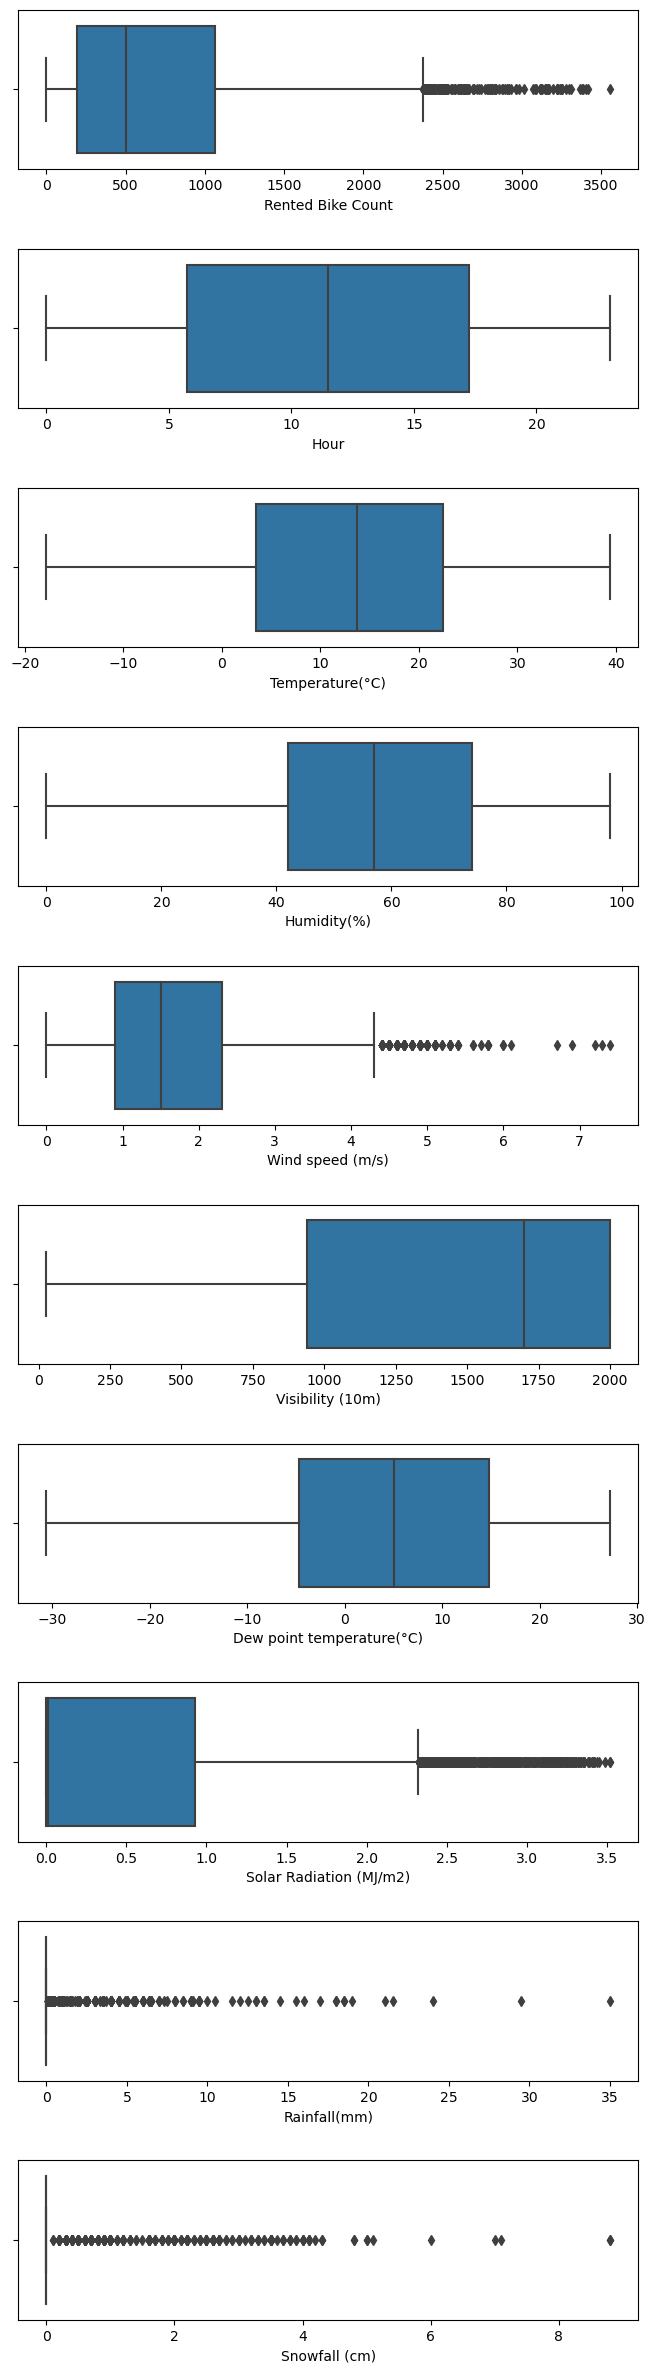

In [12]:
# Generar gráficas individuales de las variables numéricas:
fig, ax = plt.subplots(nrows=len(var_num_columns), ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(var_num_columns):
    sns.boxplot(x=col, data=df, ax=ax[i])

**Observaciones:**
- Despues de revisar algunos topicos referente a precipitacion y las nevadas, se concluye que no existen outliers que necesiten ser eliminados en las columnas que contienen variables categoricas.

### 1.3 Errores tipográficos en variables categóricas

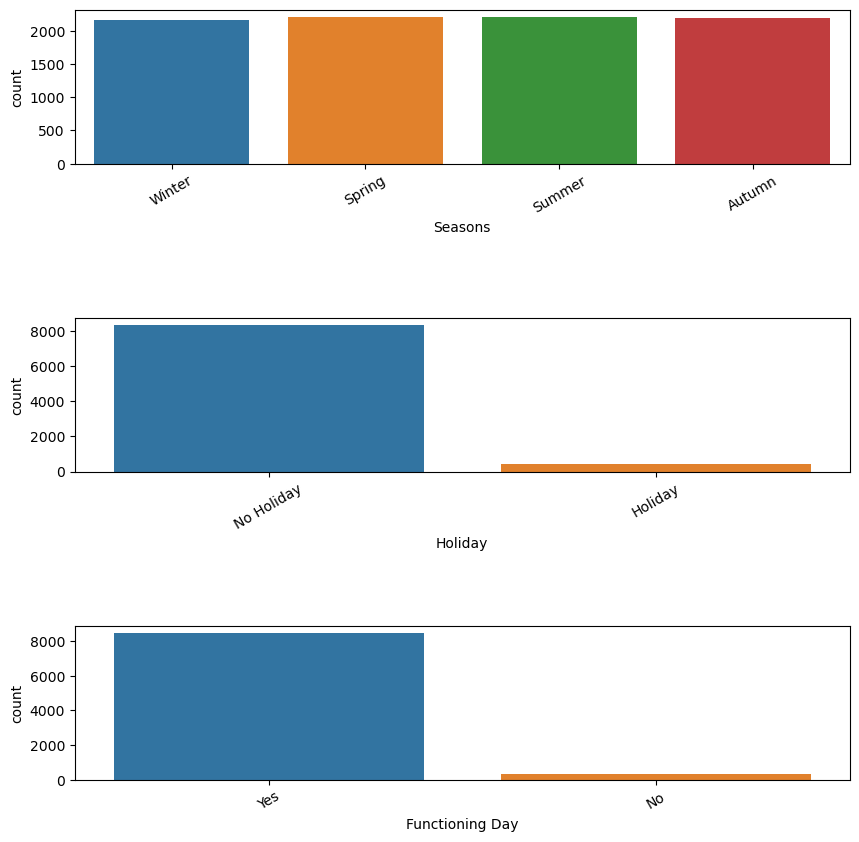

In [13]:
# Graficar los subniveles de cada variable categórica
fig, ax = plt.subplots(nrows=len(var_cat_columns[1:]), ncols=1, figsize=(10,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(var_cat_columns[1:]):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

**Observaciones**
Se puede observar que no hay errores tipograficos, pero si es necesario transformar los datos para su mejor uso en el apartado del analisis exploratorio de los datos y posteriormente la construccion del modelo. Mas especificamente:
- Convertir las variables de la columna "Holiday" a valores numericos (0 y 1).
- Un proceso similar al anterior se puede realizar a la columna "Functioning Day".
- Se puede anotar desde esta instancia que las variables de la columna "Seasons" pueden transformarce en variables dummies.

## 2 Transformacion de los datos.

In [14]:
# Transformando las variables de la columna "Holiday":
df.loc[df["Holiday"] == "Holiday", "Holiday"] = 1
df.loc[df["Holiday"] == "No Holiday", "Holiday"] = 0

In [15]:
df["Holiday"].unique()

array([0, 1], dtype=object)

In [16]:
# Transformando las variables de la columna "Functioning Day":
df.loc[df["Functioning Day"] == "Yes", "Functioning Day"] = 1
df.loc[df["Functioning Day"] == "No", "Functioning Day"] = 0

In [17]:
df["Functioning Day"].unique()

array([1, 0], dtype=object)

In [18]:
# Cambiando el tipo de dato a las columnas "Holiday" y "Functioning Day"
df["Holiday"] = df["Holiday"].astype("int64")
df["Functioning Day"] = df["Functioning Day"].astype("int64")

#### Transformando la columna "Date":

In [19]:
df["Date"].head()

0    01/12/2017
1    01/12/2017
2    01/12/2017
3    01/12/2017
4    01/12/2017
Name: Date, dtype: object

In [20]:
# Diviendo la columna "Date" en sus partes:
df[["day", "month", "year"]] = df.Date.str.split("/", expand=True)

In [21]:
# Eliminando la columna "Date":
df.drop("Date", axis=1, inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,01,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,01,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,01,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,01,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,01,12,2017


In [22]:
df["year"].unique()

array(['2017', '2018'], dtype=object)

In [23]:
# Cambiamos el tipo de dato a las columnas recien creadas:
df["year"] = df["year"].astype("int64")
df["month"] = df["month"].astype("int64")
df["day"] = df["day"].astype("int64")

#### Ultimas transformaciones:

In [24]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year'],
      dtype='object')

In [25]:
df.shape

(8760, 16)

In [26]:
# Cambiando el nombre de las columnas:
df.rename(columns={
    "Rented Bike Count": "rented_bike",
    "Hour": "hour",
    "Temperature(°C)": "°C",
    "Humidity(%)": "humidity",
    "Wind speed (m/s)": "wind_speed",
    "Visibility (10m)": "visibility",
    "Dew point temperature(°C)": "°C_dew",
    "Solar Radiation (MJ/m2)": "solar_rad",
    "Rainfall(mm)": "rainfall",
    "Snowfall (cm)": "snowfall",
    "Seasons": "season",
    "Holiday": "holiday",
    "Functioning Day": "func_day"
}, inplace=True)

In [27]:
# Ordenando las columnas:
df = df[["year", "month", "day", "hour", "func_day", "holiday", "°C", "°C_dew", "humidity", "wind_speed", "visibility", "solar_rad", "rainfall", "snowfall", "season", "rented_bike"]]

In [28]:
df.head()

,year,month,day,hour,func_day,holiday,°C,°C_dew,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,season,rented_bike
0,2017,12,1,0,1,0,-5.2,-17.6,37,2.2,2000,0.0,0.0,0.0,Winter,254
1,2017,12,1,1,1,0,-5.5,-17.6,38,0.8,2000,0.0,0.0,0.0,Winter,204
2,2017,12,1,2,1,0,-6.0,-17.7,39,1.0,2000,0.0,0.0,0.0,Winter,173
3,2017,12,1,3,1,0,-6.2,-17.6,40,0.9,2000,0.0,0.0,0.0,Winter,107
4,2017,12,1,4,1,0,-6.0,-18.6,36,2.3,2000,0.0,0.0,0.0,Winter,78


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8760 non-null   int64  
 1   month        8760 non-null   int64  
 2   day          8760 non-null   int64  
 3   hour         8760 non-null   int64  
 4   func_day     8760 non-null   int64  
 5   holiday      8760 non-null   int64  
 6   °C           8760 non-null   float64
 7   °C_dew       8760 non-null   float64
 8   humidity     8760 non-null   int64  
 9   wind_speed   8760 non-null   float64
 10  visibility   8760 non-null   int64  
 11  solar_rad    8760 non-null   float64
 12  rainfall     8760 non-null   float64
 13  snowfall     8760 non-null   float64
 14  season       8760 non-null   object 
 15  rented_bike  8760 non-null   int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 1.1+ MB


### 3 Exportacion de los datos:

In [30]:
df.to_csv("data/bike_clean.csv", index=False)